## SALES PREDICTION USING PYTHON

**Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.**

**In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let'
s embark onthe journey of sales prediction using machine learning in Python.**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [3]:
sale=pd.read_csv('advertising.csv')
sale.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
sale.shape

(200, 4)

In [6]:
sale.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data cleaning

In [7]:
sale.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is no need to clean the dataset as there are no null values

## Data Analysis

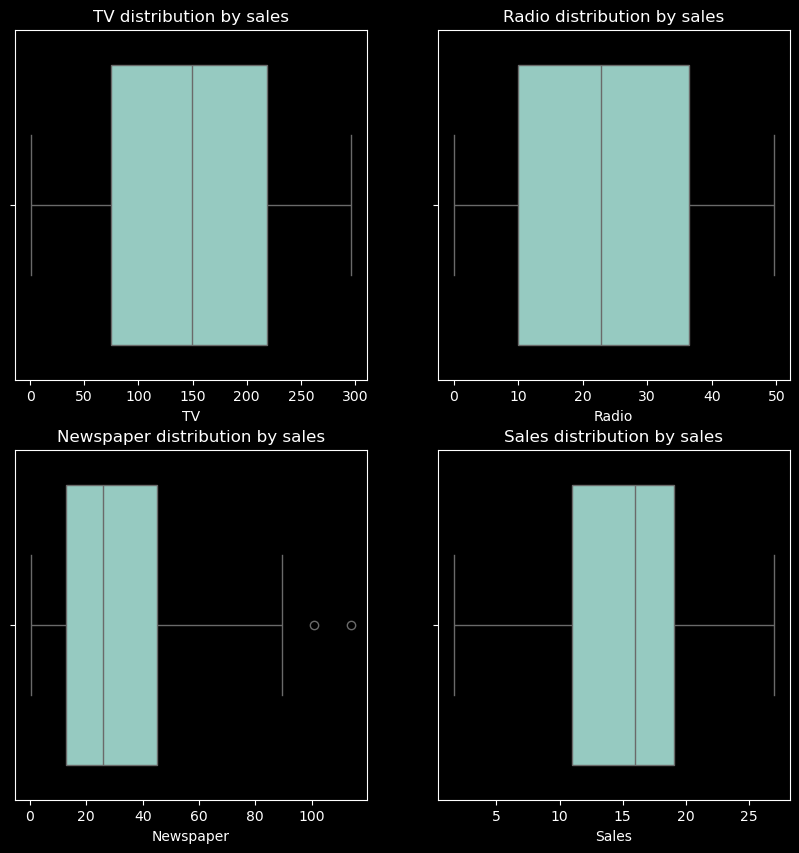

In [13]:
def box_plot(y):
    sns.boxplot(data=sale,x=y)
plt.figure(figsize=(10,10))
for i,j in enumerate(sale.columns[:4]):
    plt.subplot(2,2,i+1)
    box_plot(j)
    plt.title(f'{j} distribution by sales')
plt.show()
    

In this subplots we can see that all other advertising modes other than tv has lower expenditures

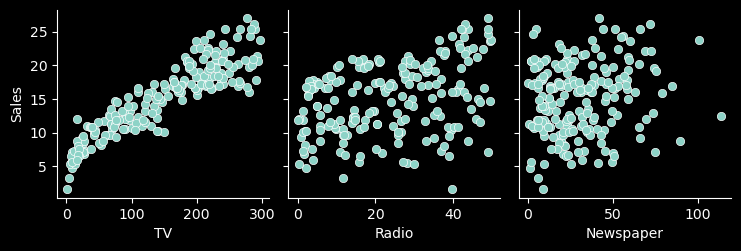

In [14]:
sns.pairplot(sale,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

Here tv has a very uniform growth when compared with sales but radio and newspaper have uneven and  scattered points

<Axes: >

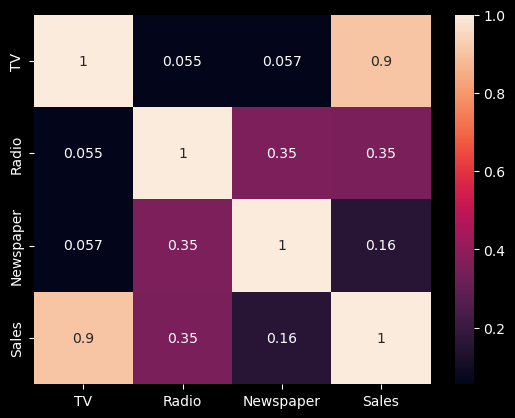

In [15]:
sns.heatmap(sale.corr(),annot=True)

##### TV has the maximum sale potential and hence advertising can be optimised

## Train and test data

In [23]:
X=sale['TV']
y=sale['Sales']


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [27]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
z=sm.OLS(y_train,X_train_sm).fit()
z.params

const    7.162371
TV       0.053294
dtype: float64

In [28]:
z.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     508.9
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           3.97e-47
Time:                        20:50:08   Log-Likelihood:                -295.60
No. Observations:                 134   AIC:                             595.2
Df Residuals:                     132   BIC:                             601.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1624      0.391     18.312      0.000       6.389       7.936
TV             0.0533      0.002     22.559      0.000       0.049       0.058
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.069
Skew:                           0.044   Prob(JB):                        0.966
Kurtosis:                       2.933   Cond. No.                         339.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

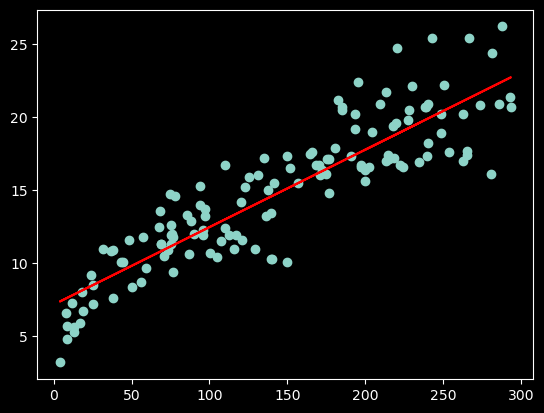

In [29]:
plt.scatter(X_train,y_train)
plt.plot(X_train,7.162+0.053*X_train,'r')

In [30]:
y_pred=z.predict(X_train_sm)

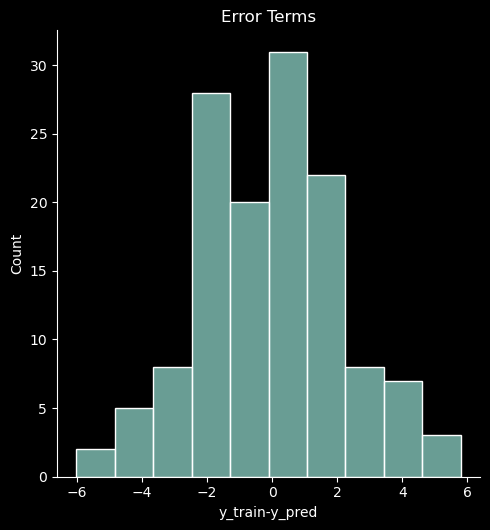

In [31]:
sns.displot(y_train-y_pred)
plt.title('Error Terms')
plt.xlabel('y_train-y_pred')
plt.show()

In [32]:
X_test_sm=sm.add_constant(X_test)
y_pred=z.predict(X_test_sm)

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.4839098646941338

In [35]:
r2_score(y_test,y_pred)


0.8293421933737147

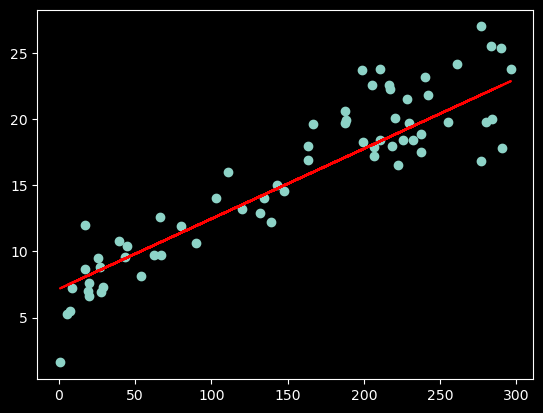

In [36]:
plt.scatter(X_test,y_test)
plt.plot(X_test,7.162+0.053*X_test,'r')